Привет, Кирилл! 

Меня зовут Светлана Медведева и я буду проверять Твою работу. Предлагаю общаться на "ты". 

При обнаружении у Тебя в работе ошибки, в первый раз я лишь укажу на ее наличие и у Тебя будет возможность самому найти её и исправить. В реальной работе твой начальник будет поступать также, а я пытаюсь подготовить тебя именно к работе аналитиком. Однако если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку.

Просьба при доработке работы оставлять мои комментарии без изменений.

Комментарии я разделяю на следующие категории:

<div class="alert alert-block alert-success">
В случае если всё верно!
</div>


<div class="alert alert-block alert-warning">
В случае если можно что-то доработать, но эта доработка не критична или если есть варианты улучшения работы.
</div>

<div class="alert alert-block alert-danger">
Замечания, которые нужно исправить. Без исправления этих замечаний проект принят не может быть.
</div>

### <font color='blue'>Резензия на работу v. 1</font> <a class="tocSkip">
* В целом у Тебя отличная работа, но требуются доработки.
    
### <font color='blue'>Резензия на работу v. 2</font> <a class="tocSkip">
* Молодец, Ты успешно выполнил все доработки проекта.
* Поздравляю проект зачтён :)
* Успехов на следующем спринте!

# A/B тест интернет-магазина

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

Часть 1. Приоритизация гипотез.<br>
Часть 2. Анализ A/B-теста

Цель проекта: проанализировать результаты А/Б-теста и принять решение по итогам.

# Оглавление

# Часть 1. Приоритизация гипотез.
1.1. [Загрузка и изучение данных](#step1-1)<br>
1.2. [Гипотезы:](#step1-2)<br>
-    1.2.1. [ICE](#step1-2-1)<br>
-    1.2.2. [RICE](#step1-2-2)<br>
-    1.2.3. [Выводы](#step1-2-3)<br>
    
# Часть 2. Анализ A/B-теста
2.1. [Загрузка и изучение данных](#step2-1)<br>
2.2. [Задачи:](#step2-2)<br>
- 2.2.1. [График кумулятивной выручки по группам.](#step2-2-1)<br>
- 2.2.2. [График кумулятивного среднего чека по группам.](#step2-2-2)<br>
- 2.2.3. [График относительного изменения кумулятивного среднего чека группы B к группе A.](#step2-2-3)<br>
- 2.2.4. [График кумулятивной конверсии по группам.](#step2-2-4)<br>
- 2.2.5. [График относительного изменения кумулятивной конверсии группы B к группе A.](#step2-2-5)<br>
- 2.2.6. [Точечный график количества заказов по пользователям.](#step2-2-6)<br>
- 2.2.7. [Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.](#step2-2-7)<br>
- 2.2.8. [Постройте точечный график стоимостей заказов.](#step2-2-8)<br>
- 2.2.9. [Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.](#step2-2-9)<br>
- 2.2.10. [Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным.](#step2-2-10)<br>
- 2.2.11. [Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.](#step2-2-11)<br>
- 2.2.12. [Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным.](#step2-2-12)<br>
- 2.2.13. [Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.](#step2-2-13)<br>
- 2.2.14. [Решение по результатам теста.](#step2-2-14)<br>

3. [Вывод](#step3)

<div class="alert alert-block alert-warning">
Комментарий ревьюера v. 1:
    
Молодец, что кратко описала проект, но сформулируй, пожалуйста, цель проекта.
</div>

<div style="background:#b4bef7; padding: 10px; borderder: 1px solid #3f51b5">
    Добавил
</div>

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 2:
    
Отлично, цель проекта сформулирована.
</div>

---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
class Image:

    def __init__(self, width = 13, height = 4, dpi = 90, title = None, xlabel = None, ylabel = None, legend = False, grid = False):
        """Класс запоминает все необходимые параметры рисунка."""
        self.width = width
        self.height = height
        self.dpi = dpi

        self.legend = legend
        self.grid = grid
        
        self.title = title
        self.xlabel = xlabel
        self.ylabel = ylabel


    def __enter__(self):
        """Вызывается на входе в конструкцию with."""
        plt.figure(figsize = (self.width, self.height), dpi = self.dpi)
    
    
    def __exit__(self, *args):
        """Вызывается на выходе из конструкции with."""
        if self.legend:
            plt.legend()
            
        if self.grid:
            plt.grid()
        
        plt.suptitle(self.title)
        plt.xlabel(self.xlabel)
        plt.ylabel(self.ylabel)
        
        plt.show()
        plt.close()

## Часть 1. Приоритезация гипотез
### 1.1 Загрузка и изучение данных
<a id="step1-1"></a>

In [3]:
pd.set_option('display.max_colwidth', 100)

try:
    df_hypothesis = pd.read_csv('./datasets/hypothesis.csv')
except:
    df_hypothesis = pd.read_csv('/datasets/hypothesis.csv')

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 1:
    
Отличная идея использовать try-except для прописывания пути к файлам.
</div>

In [4]:
print(df_hypothesis.info())
df_hypothesis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
None


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


### 1.2. Гипотезы
<a id="step1-2"></a>

- [X] 1.2.1. Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- [X] 1.2.2. Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- [X] 1.2.3. Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

#### 1.2.1 Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
<a id="step1-2-1"></a>

In [5]:
df_hypothesis['ICE'] = (df_hypothesis['Impact'] * df_hypothesis['Confidence']) / df_hypothesis['Efforts']

In [6]:
df_hypothesis.sort_values(by = 'ICE', ascending = False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3,8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000


Порядок гипотез по ICE: 8, 0, 7, 6, 2, 1

#### 1.2.2. Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
<a id="step1-2-2"></a>

In [7]:
df_hypothesis['RICE'] = (df_hypothesis['Reach'] * df_hypothesis['Impact'] * df_hypothesis['Confidence']) / df_hypothesis['Efforts']

In [8]:
df_hypothesis.sort_values(by = 'RICE', ascending = False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


Порядок гипотез по RICE: 7, 2, 0, 6, 8, 3

#### 1.2.3. Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.
<a id="step1-2-3"></a>

Порядок гипотез по ICE: 8, 0, 7, 6, 2, 1<br>
Порядок гипотез по RICE: 7, 2, 0, 6, 8, 3

При сортировке по параметру RICE, вперед вышли гипотезы с повышенным показателем Reach. 

Например, гипотеза 8 по ICE (почти максимальный Impact и Confidence) сместилась с 1 места на 5, поскольку Reach всего лишь единица. Т.е. гипотеза важная и в уверенность в ней высокая, но из-за низкого охвата приоритет снизился.

/opt/conda/lib/python3.7/site-packages/pandas/core/indexes/base.py:111: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = op(self.values, np.asarray(other))


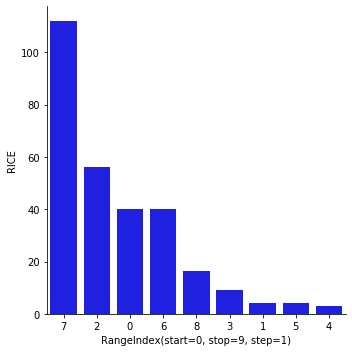

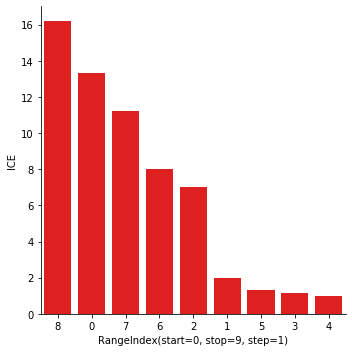

In [9]:
sns.catplot(
    data = df_hypothesis, 
    x = df_hypothesis.index, 
    y = 'RICE', 
    order = df_hypothesis.sort_values(by = 'RICE', ascending = False).index, 
    color = 'blue', 
    label = 'RICE', 
    kind = 'bar'
)


sns.catplot(
    data = df_hypothesis, 
    x = df_hypothesis.index, 
    y = 'ICE', 
    order = df_hypothesis.sort_values(by = 'ICE', ascending = False).index, 
    color = 'red', 
    label = 'ICE', 
    kind = 'bar'
)
plt.show()

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 1:
    
Приоритет гипотез рассчитан верно, но можно ещё отобразить полученные значения на графике для более наглядного представления и удобного анализа.
    
Ты верно прокомментировал различия в оценках.
</div>

<div style="background:#b4bef7; padding: 10px; borderder: 1px solid #3f51b5">
Добавил. Но графики - это моя боль. Потратил 2 часа, но так и не смог отобразить 2 колонки на одном столбчатом графике. Аналогично не получилось нормально отобразить 2 графика рядом, в одну строку. Тысячу раз попробовал subplots, но что-то не получается.<br>
    
Вроде бы понимаю, что `fig,ax = plt.subplots(1,2)` рисует фигуру в оси которой потом кладет ax, но разобраться не могу как этим управлять. Надеюсь, с течением времени разберусь.
</div>

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 2:
    
Думаю, что эти примеры Тебе помогут :)

https://pythonbasics.org/seaborn-barplot/
</div>

## Часть 2. Анализ A/B-теста

Проанализируйте A/B-тест:
- [x] 2.2.1.Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
- [x] 2.2.2.Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
- [x] 2.2.3.Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
- [x] 2.2.4.Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.
- [x] 2.2.5.Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.
- [x] 2.2.6.Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
- [x] 2.2.7.Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
- [x] 2.2.8.Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
- [x] 2.2.9.Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
- [x] 2.2.10.Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.
- [x] 2.2.11.Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
- [x] 2.2.12.Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.
- [x] 2.2.13.Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
- [x] 2.2.14.Примите решение по результатам теста и объясните его. Варианты решений: 
    - 1. Остановить тест, зафиксировать победу одной из групп. 
    - 2. Остановить тест, зафиксировать отсутствие различий между группами. 
    - 3. Продолжить тест.

### 2.1 Загрузка и изучение данных
<a id ="step2-1">

In [10]:
try:
    df_orders = pd.read_csv('./datasets/orders.csv')
    df_visitors = pd.read_csv('./datasets/visitors.csv')
except:
    df_orders = pd.read_csv('/datasets/orders.csv')
    df_visitors = pd.read_csv('/datasets/visitors.csv')

In [11]:
print(df_orders.info(), df_visitors.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None None


In [12]:
df_orders['date']   = df_orders['date'].astype('datetime64[D]')
df_visitors['date'] = df_visitors['date'].astype('datetime64[D]')

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 1:
    
Да, тип данных изменён верно.
</div>

In [13]:
df_orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [14]:
df_visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


### 2.2 Задачи:
<a id="step2-2"></a>

#### 2.2.1.Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
<a id="step2-2-1"></a>

# Вопрос:
Хотел вынести класс в отдельный модуль, но при импорте выдавало ошибку, что нет plt. Попробовал импортировать matplotlib.pyplot as plt в файле модуля - все равно. Подскажи, пожалуйста, как вынести класс и другие ибилиотеки в отдельный модуль и подключать, чтобы все работало?

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 1:
    
Предлагаю посмотреть: https://pythonworld.ru/osnovy/rabota-s-modulyami-sozdanie-podklyuchenie-instrukciyami-import-i-from.html, https://devpractice.ru/python-modules-and-packages/
</div>

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 1:
    
Кстати, warnings можно убрать:
</div>

In [15]:
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

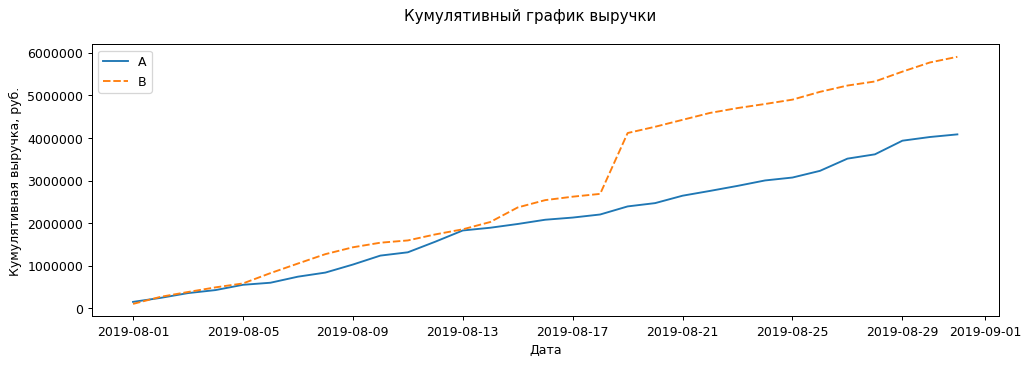

In [16]:
with Image(title = 'Кумулятивный график выручки', xlabel = 'Дата', ylabel = 'Кумулятивная выручка, руб.'):
    sns.lineplot(
        data = df_orders.pivot_table(
            index = 'date',
            columns = 'group',
            values = 'revenue',
            aggfunc = 'sum'
        ).cumsum(axis = 0)
    )

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 1:
    
Отличный график, молодец, что не забыл подписи по осям и заголовок к графику.
</div>

###### Вывод
17 дней выручка в обоих группах примерно одинаковая и растет. На 18 день в группе B выручка резко увеличивается и рост продолжается в обоих группах.

Предположение: видимо, запустили 7 или 8 гипотезу.<br>
7 - в начале теста для тестовой группы добавили форму для сбора емейлов. На 18 день провели рассылку и часть пользователей сконвертировалась в покупки.<br>
8 - дать скидку в ДР - у какого-то кол-ва пользователей был ДР в этот день и они купили больше, чем пользователи, которые не попали в тестовую группу.

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 1:
    
Да, это может быть причиной скачка в выручке.
</div>

#### 2.2.2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
<a id="step2-2-2"></a>

In [17]:
df_orders_grouped = df_orders.groupby(['date', 'group']).agg({'revenue' : 'sum', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique}).reset_index()

In [18]:
df_orders_grouped['av_bill'] = df_orders_grouped['revenue'] / df_orders_grouped['transactionId']

In [19]:
df_orders_grouped.head()

,date,group,revenue,transactionId,visitorId,av_bill
0,2019-08-01,A,148579,24,20,6190.791667
1,2019-08-01,B,101217,21,20,4819.857143
2,2019-08-02,A,93822,20,19,4691.100000
3,2019-08-02,B,165531,24,23,6897.125000
4,2019-08-03,A,112473,24,24,4686.375000


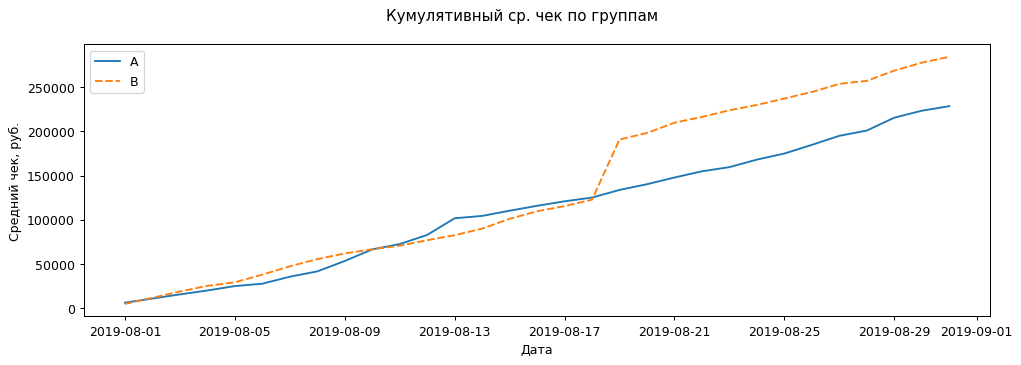

In [20]:
with Image(title = 'Кумулятивный ср. чек по группам', xlabel = 'Дата', ylabel = 'Средний чек, руб.'):
    sns.lineplot(
        data = df_orders_grouped.pivot_table(
            index = 'date',
            columns = 'group',
            values = 'av_bill',
            aggfunc = 'mean'
        ).cumsum(axis = 0)
    )

###### Вывод
Аналогично кумулятивной выручке, накопительный средний чек тоже растет после 18 дня. Хотя в отличие от выручки, группа B проседает по отношению к группе А с 10 по 18 число.

Предположение: появились допродажи, которые повлияли на размер среднего чека. Если взять предыдущее предположение, то скорее всего начала работать емейл-рассылка.

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 1:
    
Молодец, что детально проанализировал график и объяснил обнаруженные закономерности. 
</div>

#### 2.2.3 Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
<a id="step2-2-3"></a>

In [21]:
t = df_orders_grouped.pivot_table(
            index = 'date',
            columns = 'group',
            values = 'av_bill',
            aggfunc = 'mean'
        ).cumsum(axis = 0)

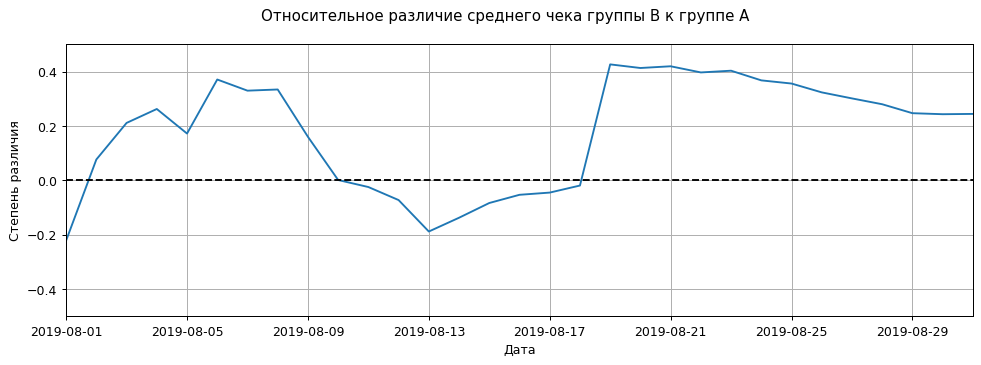

In [22]:
with Image(title = 'Относительное различие среднего чека группы B к группе A', xlabel = 'Дата', ylabel = 'Степень различия', grid = True):
    sns.lineplot(data = t, x = t.index, y = t['B'] / t['A'] - 1)
    
    plt.axhline(y = 0, color = 'black', linestyle = '--')

    plt.axis([t.index.min(), t.index.max(), -0.5, 0.5])
    

###### Вывод
С начала эксперимента график различия между сегментами резко скачет, что свидетельствует о выбросах (крупные заказы, которые повлияли на средний чек). После 18 числа ср. чек группы B постепенно снижается и выходит на плато 29 числа на уровне примерно 0.22.

На графике видна просадка как раз с 10 по 18 число, когда группа А вышла немного вперед по среднему чеку (это видно было на предыдущем графике).

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 1:
    
Отличный анализ :)
</div>

#### 2.2.4 Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.
<a id="step2-2-4"></a>

In [23]:
df_merged = pd.merge(df_orders_grouped, df_visitors, left_on = ['date', 'group'], right_on = ['date', 'group'])
df_merged = df_merged.rename(columns = ({'transactionId' : 'orders', 'visitorId' : 'buyers'}))
df_merged.head(6)

,date,group,revenue,orders,buyers,av_bill,visitors
0,2019-08-01,A,148579,24,20,6190.791667,719
1,2019-08-01,B,101217,21,20,4819.857143,713
2,2019-08-02,A,93822,20,19,4691.100000,619
3,2019-08-02,B,165531,24,23,6897.125000,581
4,2019-08-03,A,112473,24,24,4686.375000,507
5,2019-08-03,B,114248,16,16,7140.500000,509


In [59]:
df_merged['cr'] = df_merged['buyers'] / df_merged['visitors']

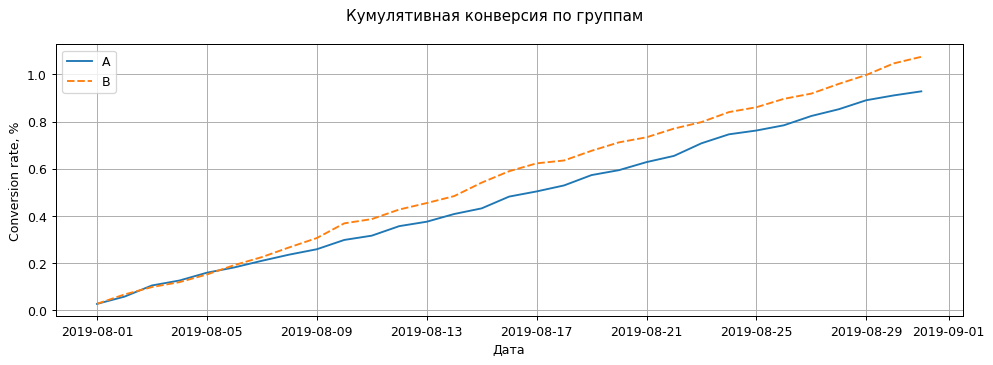

In [60]:
with Image(title = 'Кумулятивная конверсия по группам', xlabel = 'Дата', ylabel = 'Conversion rate, %', grid = True):
    sns.lineplot(
        data = df_merged.pivot_table(
                index = 'date',
                columns = 'group',
                values = 'cr',
                aggfunc = 'mean'
            ).cumsum(axis = 0)
    )

<div class="alert alert-block alert-danger">
Комментарий ревьюера v. 1:
    
Перепроверь, пожалуйста, график. Конверсия стабилизируется к концу эксперимента.
</div>

<div style="background:#b4bef7; padding: 10px; borderder: 1px solid #3f51b5">
    Она вроде бы и стабильна, там особо отличий нет. В группе А ухудшение с 0.95 до 0.94 или что-то вроде того.
</div>

###### Вывод
Кумулятивная конверсии группы B обгоняет группу А через неделю после запуска эксперимента и сохраняет отрыв, но не увеличивает его. К концу эксперимента видно, что конверсия группы А начинает ухудшаться. 

<div class="alert alert-block alert-warning">
Комментарий ревьюера v. 2:
    
Видимо, различия связаны с тем, что Ты 'buyers', а не 'orders' для расчёта.
</div>

#### 2.2.5 Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.
<a id="step2-2-5"></a>

In [26]:
t = df_merged.pivot_table(
                index = 'date',
                columns = 'group',
                values = 'cr',
                aggfunc = 'mean'
            ).cumsum(axis = 0)

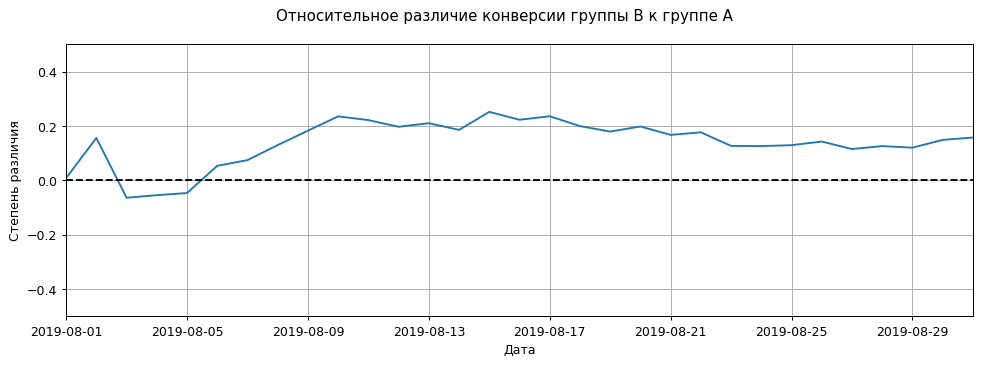

In [27]:
with Image(title = 'Относительное различие конверсии группы B к группе A', xlabel = 'Дата', ylabel = 'Степень различия', grid = True):
    sns.lineplot(data = t, x = t.index, y = t['B'] / t['A'] - 1)
    
    plt.axhline(y = 0, color = 'black', linestyle = '--')

    plt.axis([t.index.min(), t.index.max(), -0.5, 0.5])  

###### Вывод
Конверсия группы B после недели эксперимента стабильно больше группы А и находится в среднем на уровне 0.2. К концу третьей недели она начинает снижаться, но к концу месяца снова постепенно растет.

Предположение: рассылка увеличила количество контактов с пользователями, что подтолкнуло их к принятию решения о совершении покупки. Поскольку это был новый формат коммуникации, то сначала пользователи активней покупали, но с течением времени канал коммуникации стал обыденным и пользователи привыкли к нему.

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 1:
    
Да, группа B лидирует. Молодец, что предположил с чем могут быть связаны наблюдаемые изменения.
</div>

#### 2.2.6 Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
<a id="step2-2-6"></a>


In [28]:
df_orders.groupby('visitorId', as_index = False).agg({'transactionId' : 'nunique'}).sort_values(by = 'transactionId', ascending = False).head(10)

,visitorId,transactionId
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


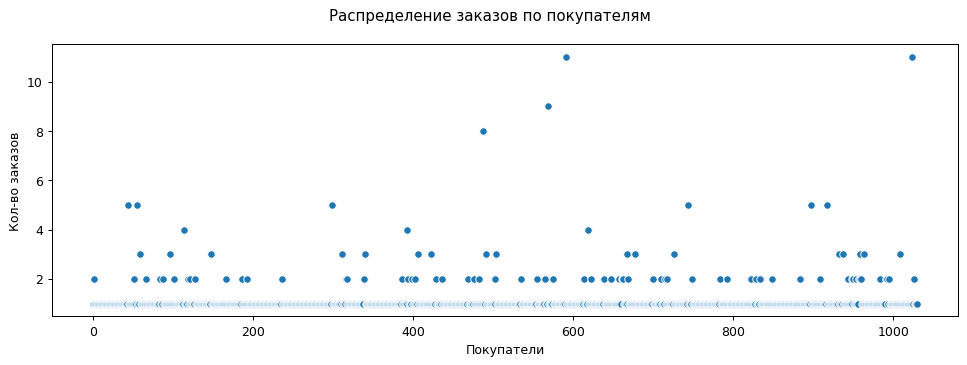

In [29]:
with Image(title = 'Распределение заказов по покупателям', xlabel = 'Покупатели', ylabel = 'Кол-во заказов'):
    sns.scatterplot(
        data = df_orders.groupby('visitorId', as_index = False).agg({'transactionId' : 'nunique'})['transactionId']
    )

###### Вывод
Есть покупатели, которые совершали от 5 до 11 заказов. В основном все совершали по 1 заказу.

Предположение: есть определенное количество покупателей, которые совершили 2 заказа и более заказов. Возможно, это тестовая группа, которая получила рассылку.

#### 2.2.7 Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
<a id="step2-2-7"></a>

In [30]:
orders_filter_count = np.percentile(df_orders.groupby('visitorId', as_index = False).agg({'transactionId' : 'nunique'})['transactionId'], [95, 99])
orders_filter_count

array([2., 4.])

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 1:
    
Отлично, 95-й и 99-й перцентили количества заказов на пользователя рассчитаны верно.
</div>

###### Вывод
Граница для аномальных заказов по 95 перцентилю = 2 заказа.

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 1:
    
Граница аномалий определена :)
</div>

#### 2.2.8 Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
<a id="step2-2-8"></a>


In [31]:
df_orders.groupby('transactionId', as_index = False).agg({'revenue' : 'sum'})['revenue'].describe().map('{:.0f}'.format)

count       1197
mean        8348
std        39191
min           50
25%         1220
50%         2978
75%         8290
max      1294500
Name: revenue, dtype: object

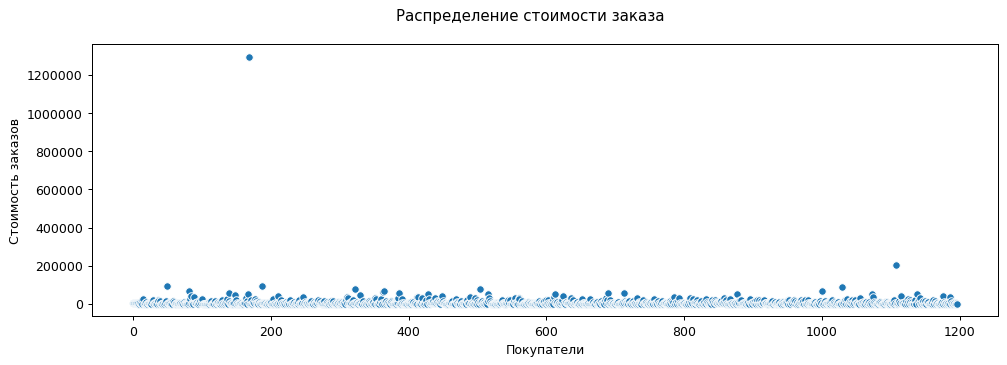

In [32]:
with Image(title = 'Распределение стоимости заказа', xlabel = 'Покупатели', ylabel = 'Стоимость заказов'):
    sns.scatterplot(
        data = df_orders.groupby('transactionId', as_index = False).agg({'revenue' : 'sum'})['revenue']
    )

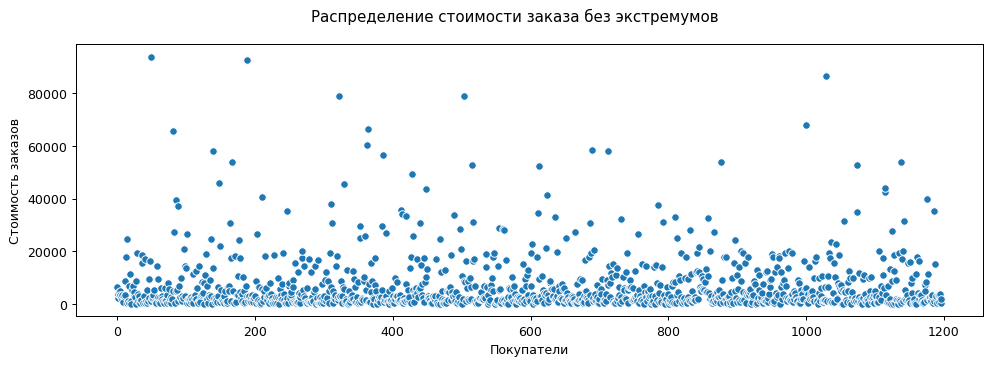

In [33]:
with Image(title = 'Распределение стоимости заказа без экстремумов', xlabel = 'Покупатели', ylabel = 'Стоимость заказов'):
    sns.scatterplot(
        data = df_orders.groupby('transactionId', as_index = False).agg({'revenue' : 'sum'}).query('revenue < 100000')['revenue']
    )

###### Вывод
Есть выброс на 1,29 млн. и 400к, но основная часть заказов до 8290 руб.

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 1:
    
Молодец, что проанализировал распределение стоимости заказов.
</div>

#### 2.2.9 Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
<a id="step2-2-9"></a>

In [34]:
orders_filter_sum = np.percentile(df_orders.groupby('transactionId', as_index = False).agg({'revenue' : 'sum'})['revenue'], [95, 99])
orders_filter_sum

array([28000. , 58233.2])

###### Вывод
Граница для аномальных заказов по 95 перцентилю = 28 000 руб.

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 1:
    
Отлично, перцентили рассчитаны, граница для аномалий определена.
</div>

#### 2.2.10 Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.
<a id="step2-2-10"></a>


In [35]:
df_orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [36]:
orders_a = df_orders.query('group == "A"').groupby('visitorId', as_index = False).agg({'transactionId' : 'nunique', 'revenue' : 'sum'}).rename(columns = {'transactionId' : 'orders'})
print('Кол-во покупателей в группе А = {} чел.'.format(len(orders_a)))

Кол-во покупателей в группе А = 503 чел.


In [37]:
orders_b = df_orders.query('group == "B"').groupby('visitorId', as_index = False).agg({'transactionId' : 'nunique', 'revenue' : 'sum'}).rename(columns = {'transactionId' : 'orders'})
print('Кол-во покупателей в группе В = {} чел.'.format(len(orders_b)))

Кол-во покупателей в группе В = 586 чел.


---

In [38]:
sample_a = pd.Series(0, index = np.arange(df_visitors.query('group == "A"')['visitors'].sum() - len(orders_a['orders'])), name = 'orders')
print('Кол-во юзеров без заказов для выборки А: {}'.format(len(sample_a)))

Кол-во юзеров без заказов для выборки А: 18233


In [39]:
sample_b = pd.Series(0, index = np.arange(df_visitors.query('group == "B"')['visitors'].sum() - len(orders_b['orders'])), name = 'orders')
print('Кол-во юзеров без заказов для выборки B: {}'.format(len(sample_b)))

Кол-во юзеров без заказов для выборки B: 18330


---

In [40]:
sample_a = pd.concat([sample_a, orders_a['orders']], axis = 0)
sample_a.value_counts()

0    18233
1      473
2       17
3        7
4        3
5        2
7        1
Name: orders, dtype: int64

In [41]:
sample_b = pd.concat([sample_b, orders_b['orders']], axis = 0)
sample_b.value_counts()

0    18330
1      552
2       23
3        5
4        4
6        1
5        1
Name: orders, dtype: int64

<div class="alert alert-block alert-danger">
Комментарий ревьюера v. 1:
    
Молодец, что сформулировал нулевую гипотезу, сформулируй, пожалуйста, альтернативную гипотезу в явном виде. Просьба учесть этот комментарий для всех тестов.
</div>

<div style="background:#b4bef7; padding: 10px; borderder: 1px solid #3f51b5">
    Добавил
</div>

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 2:
    
Отлично, нулевая и альтернативная гипотезы сформулированы верно.
</div>

In [42]:
print("p-value: {0:.3f}".format(stats.mannwhitneyu(sample_a, sample_b)[1]))
print("Разница в конверсии: {0:.3f}".format(sample_b.mean() / sample_a.mean() - 1))

p-value: 0.008
Разница в конверсии: 0.138


###### Вывод
H0 - конверсии в обоих группах равны.<br>
H1 - конверсии в группах не равны.

p-value меньше 0.05, значит у нас есть статистически значимые отличия в двух группах. Исходя из этого, H0 гипотезу отвергаем: конверсии не равны.
Разница составляет 13.8%.

Предположение: тестовая группа (B) имеет лучшую конверсию. Емейл рассылка увеличивает конверсию в покупку.

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 1:
    
Да, есть статистически значимые различия в конверсии между группами.
</div>

#### 2.2.11 Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
<a id="step2-2-11"></a>

<div class="alert alert-block alert-danger">
Комментарий ревьюера v. 1:
    
Добавь, пожалуйста, формулировку альтернативной гипотезы.
</div>

<div style="background:#b4bef7; padding: 10px; borderder: 1px solid #3f51b5">
    Добавил
</div>

In [43]:
print("p-value: {0:.3f}".format(stats.mannwhitneyu(df_orders.query('group == "A"')['revenue'], df_orders.query('group == "B"')['revenue'])[1]))
print("Разница ср. чека: {0:.3f}".format(df_orders.query('group == "B"')['revenue'].mean() / df_orders.query('group == "A"')['revenue'].mean() - 1))

p-value: 0.365
Разница ср. чека: 0.259


###### Вывод
Н0 - средний чек в обоих группах равный.<br>
H1 - средний чек в обоих группах различается.

p-value значительно больше 0.05, значит у нас нет статистически значимых отличий в двух группах. Исходя из этого, Н0 гипотезу не отвергаем: нет оснований полагать, что средние чеки различаются.
Несмотря на это, средний чек группы В больше на 25.9%

Предположение: тестовая группа (B) имеет больше средний чек, но это случайность (попал выброс, скорее всего продажа на 1.29 млн) на данных сэмплах.

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 2:
    
Да, верная формулировка гипотез.
</div>

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 1:
    
Ты верно сделал вывод, что статистически значимых различий в среднем чеке нет.
</div>

#### 2.2.12 Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.
<a id="step2-2-12"></a>


In [44]:
df_orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [45]:
# фильтры по кол-ву заказов и сумме из [0] = 95 и [1] = 99 перцентиля
print('Порог кол-ва заказов на 95-й перцентиль: {:.0f} и на 99-й перцентиль {:.0f}'.format(orders_filter_count[0], orders_filter_count[1]))
print('Порог суммы заказов на 95-й перцентиль: {:.2f} и на 99-й перцентиль {:.2f}'.format(orders_filter_sum[0], orders_filter_sum[1]))

Порог кол-ва заказов на 95-й перцентиль: 2 и на 99-й перцентиль 4
Порог суммы заказов на 95-й перцентиль: 28000.00 и на 99-й перцентиль 58233.20


За аномальных покупателей примем тех, кто совершил более двух заказов или общая сумма заказа больше 28 тыс. руб.

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 1:
    
Молодец, что описал условие для фильтрации аномальных пользователей.
</div>

---

In [46]:
orders_a_filtered = orders_a.query('orders <= @orders_filter_count[0] and revenue <= @orders_filter_sum[0]')
print('Кол-во покупателей в группе А (без верхних 5%) = {} чел.'.format(len(orders_a_filtered)))

Кол-во покупателей в группе А (без верхних 5%) = 462 чел.


In [47]:
orders_b_filtered = orders_b.query('orders <= @orders_filter_count[0] and revenue <= @orders_filter_sum[0]')
print('Кол-во покупателей в группе B (без верхних 5%) = {} чел.'.format(len(orders_b_filtered)))

Кол-во покупателей в группе B (без верхних 5%) = 543 чел.


---

In [48]:
sample_a_filtered = pd.Series(0, index = np.arange(df_visitors.query('group == "A"')['visitors'].sum() - len(orders_a_filtered['orders'])), name = 'orders')
print('Размер фильтрованной выборки А: {} '.format(len(sample_a_filtered)))

Размер фильтрованной выборки А: 18274 


In [49]:
sample_b_filtered = pd.Series(0, index = np.arange(df_visitors.query('group == "B"')['visitors'].sum() - len(orders_b_filtered['orders'])), name = 'orders')
print('Размер фильтрованной выборки B: {}'.format(len(sample_b_filtered)))

Размер фильтрованной выборки B: 18373


<div class="alert alert-block alert-warning">
Комментарий ревьюера v. 1:
    
Ок, пользователи с аномальными значения числа и стоимости заказов удалены. Но сколько аномальных пользователей у нас в данных?
</div>

<div style="background:#b4bef7; padding: 10px; borderder: 1px solid #3f51b5">
    Давай посчитаем :)
</div>

In [50]:
print('Кол-во аномальных покупателей в группе А (верхние 5%) = {} чел.'.format(len(orders_a.query('orders > @orders_filter_count[0] or revenue > @orders_filter_sum[0]'))))
print('Кол-во аномальных покупателей в группе B (верхние 5%) = {} чел.'.format(len(orders_b.query('orders > @orders_filter_count[0] or revenue > @orders_filter_sum[0]'))))

Кол-во аномальных покупателей в группе А (верхние 5%) = 41 чел.
Кол-во аномальных покупателей в группе B (верхние 5%) = 43 чел.


<div class="alert alert-block alert-success">
Комментарий ревьюера v. 2:
    
Отлично, количество аномальных пользователей подсчитано.
</div>

---

In [51]:
sample_a_filtered = pd.concat([sample_a_filtered, orders_a_filtered['orders']], axis = 0)
sample_a_filtered.value_counts()

0    18274
1      449
2       13
Name: orders, dtype: int64

In [52]:
sample_b_filtered = pd.concat([sample_b_filtered, orders_b_filtered['orders']], axis = 0)
sample_b_filtered.value_counts()

0    18373
1      523
2       20
Name: orders, dtype: int64

In [53]:
print("p-value: {0:.3f}".format(stats.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1]))
print("Разница в конверсии: {0:.3f}".format(sample_b_filtered.mean() / sample_a_filtered.mean() - 1))

p-value: 0.007
Разница в конверсии: 0.174


###### Вывод
H0 - конверсии в обоих группах равны.<br>
H1 - конверсия в обоих группах различается.

p-value в фильтрованной группе еще меньше, чем в нефильтрованной, 0.007 против 0.008. Есть стат. значимые отличия и нулевая гипотеза отвергается: конверсии не равны.
Разница в конверсии также различается: 17.4% против 13.8%.

Предположение: очищенная тестовая группа (B) имеет лучшую конверсию. Емейл рассылка увеличивает конверсию в покупку.

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 1:
    
Да, статистически значимые различия по конверсии по-прежнему есть.
</div>

#### 2.2.13.Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
<a id="step2-2-13"></a>

In [54]:
print("p-value: {0:.3f}".format(stats.mannwhitneyu(orders_a_filtered['revenue'], orders_a_filtered['revenue'])[1]))
print("Разница ср. чека: {0:.3f}".format(orders_b_filtered['revenue'].mean() / orders_a_filtered['revenue'].mean() - 1))

p-value: 0.500
Разница ср. чека: -0.003


###### Вывод
Н0 - средний чек в обоих группах равный.<br>
H1 - средний чек в группах различается.

p-value значительно больше 0.05, значит у нас нет статистически значимых отличий в двух группах. Исходя из этого, нулевую гипотезу не отвергаем: нет оснований полагать, что средние чеки различаются.
После фильтрации данных средний чек группы В стал практически идентичен группе А: меньше на 0.3%

Предположение: после того как убрали выбросы по ревеню покупки, средние чеки выровнялись.

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 1:
    
Ты сделал верный вывод, что статистически значимых различий в среднем чеке по-прежнему нет. Т. е. можно сказать что удаление выбросов на проверку статистических гипотез не повлияло.
</div>

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 1:
    
Дополнительные материалы: https://machinelearningmastery.com/statistical-hypothesis-tests/, https://www.isdscotland.org/About-ISD/Methodologies/_docs/Hypothesis-Testing-v0-4-2018-11-27.pdf 
</div>

#### 2.2.14.Примите решение по результатам теста и объясните его.
<a id="step2-2-14"></a>
Варианты решений: 
- 1. Остановить тест, зафиксировать победу одной из групп. 
- 2. Остановить тест, зафиксировать отсутствие различий между группами. 
- 3. Продолжить тест.

Вариант 1: Остановить тест, зафиксировать победу одной из групп.

Поскольку у нас есть значимое различие в конверсии между двумя фильтрованными группами и эта разница более-менее зафиксировалась после первой недели теста, то нет смысла продолжать эксперимент.

Средний чек не изменился. Поэтому продолжать эксперимент в надежде, что произойдут изменения, нет. 
Скачок на графике среднего чека на 17 день - выброс. При его удалении, графики выравниваются, это видно ниже.

In [55]:
t = df_orders_grouped.query('av_bill <= @orders_filter_sum[0]').pivot_table(
            index = 'date',
            columns = 'group',
            values = 'av_bill',
            aggfunc = 'mean'
        ).cumsum(axis = 0)

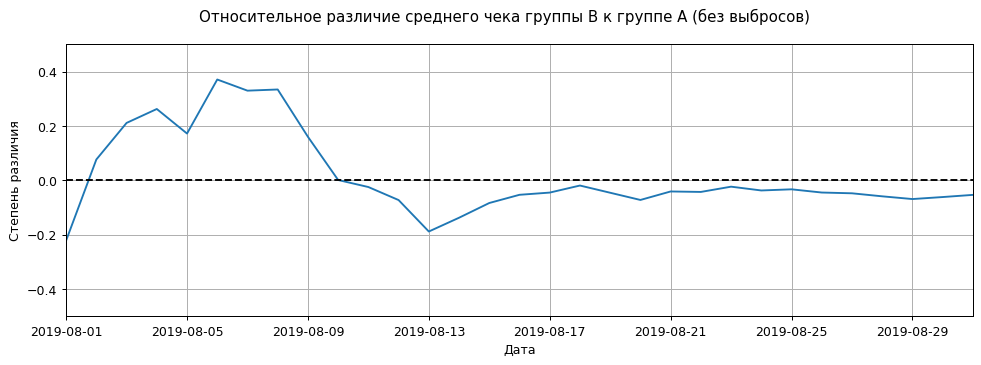

In [56]:
with Image(title = 'Относительное различие среднего чека группы B к группе A (без выбросов)', xlabel = 'Дата', ylabel = 'Степень различия', grid = True):
    sns.lineplot(data = t, x = t.index, y = t['B'] / t['A'] - 1)
    
    plt.axhline(y = 0, color = 'black', linestyle = '--')

    plt.axis([t.index.min(), t.index.max(), -0.5, 0.5])
    

## 3. Вывод
<a id="step3"></a>

Из списка гипотез была вырана гипотеза 7 (наверное, т.к. она оказалась первой в списке RICE): `Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок`. 

После запуска был обнаружен рост конверсии в покупку (на 7 день) и рост среднего чека (на 18 день группа В резко обогнала группу А). Однако, после анализа данных на аномальные выбросы и их фильтрации, оказалось, что средние чеки в двух группах практически одинаковые (группа В немного хуже группы А).

Получается, что емейл-рассылка увеличивает конверсию в покупку, но не увеличивает средний чек. В следующих экспериментах можно протестировать гипотезы по росту среднего чека.

Итоговое решение: остановить эксперимент и зафиксировать результат `конверсия группы В лучше конверсии группы А на 17.4%`.

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 1:
    
Отлично, основные результаты проекта описаны. Да, мы можем остановить тест и зафиксировать лидирование группы B.
</div>